## Part 1 - Regression

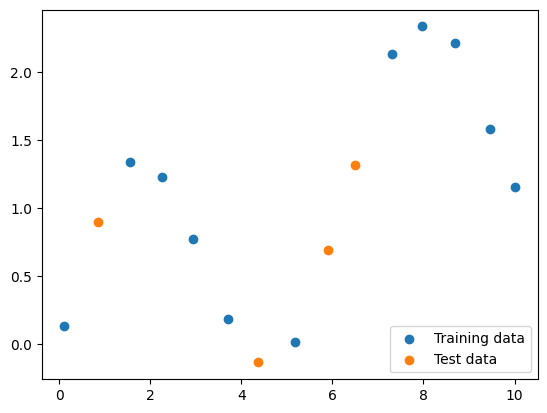

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0)
n = 15
x = np.linspace(0, 10, n) + np.random.rand(n) / 5
y = np.sin(x) + x / 6 + np.random.rand(n) / 10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

def intro():
  plt.figure()
  plt.scatter(X_train, y_train, label = 'Training data')
  plt.scatter(X_test, y_test, label = "Test data")
  plt.legend(loc = 4)
  
intro()

In [4]:
X_train

array([10.01420721,  2.94187382,  1.5491241 ,  9.47083361,  7.30120215,
        5.1783546 ,  7.96292184,  2.25183378,  0.1097627 ,  3.70060739,
        8.68503748])

In [5]:
X_test

array([0.85732359, 4.37323173, 5.90701827, 6.50525973])

### Question 1: Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model). For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0, 10, 100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.
### This function should return a numpy array with shape `(4, 100)`

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def answer_one():
  degrees = [1, 3, 6, 9]
  features = np.linspace(0, 10, 100)
  predicted_value = np.zeros((4, 100))
  for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train.reshape(-1, 1))
    features_poly = poly.fit_transform(features.reshape(-1, 1))
    linreg = LinearRegression().fit(X_poly, y_train)
    predicted_value[i, :] = linreg.predict(features_poly)
   
  return predicted_value
  
answer_one().shape

(4, 100)

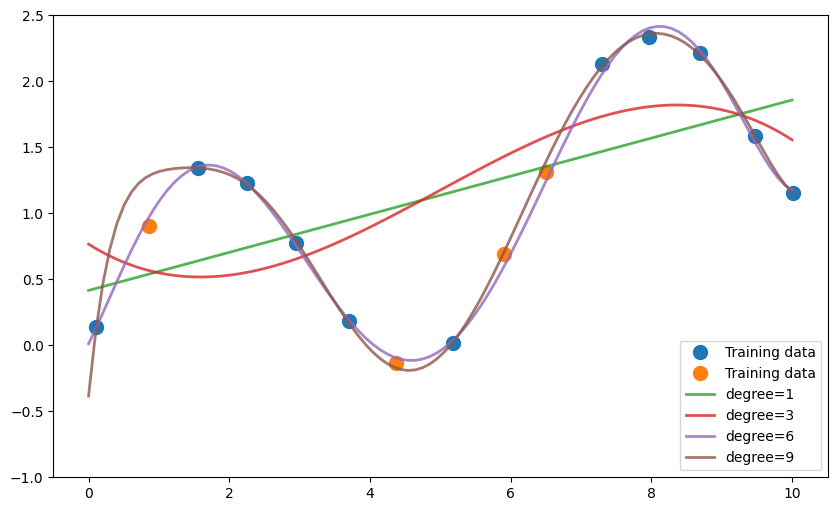

In [7]:
# visualize the function
def plot_one(answer_one):
  plt.figure(figsize=(10, 6))
  plt.plot(X_train, y_train, 'o', label = 'Training data', markersize = 10)
  plt.plot(X_test, y_test, 'o', label = 'Training data', markersize = 10)
  
  for i, degree in enumerate([1, 3, 6, 9]):
    plt.plot(np.linspace(0, 10, 100), answer_one[i],
             alpha = 0.8, lw = 2, label='degree={}'.format(degree))

  plt.ylim(-1, 2.5)
  plt.legend(loc = 4)

plot_one(answer_one())

### Question 2: Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the test data, and return both of these arrays in a tuple.
### This function should return one tuple of numpy arrays (`r2_train, r2_test`). Both arrays should have shape `(10, )`

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics._regression import r2_score

def answer_two():
  degrees2 = np.arange(0,10) 
  r2_train = np.zeros(len(degrees2))
  r2_test = np.zeros(len(degrees2))

  X_tr = X_train.reshape(-1, 1)
  X_ts = X_test.reshape(-1, 1)
  for i, degree in enumerate(degrees2):

    poly = PolynomialFeatures(degree=degree)

    train_poly = poly.fit_transform(X_tr)
    test_poly = poly.transform(X_ts)
    linreg = LinearRegression()
    linreg.fit(train_poly, y_train)
    r2_train[i] = r2_score(y_train, linreg.predict(train_poly))  
    r2_test[i] = r2_score(y_test, linreg.predict(test_poly)) 
    
  return r2_train, r2_test

answer_two()

(array([0.        , 0.35322777, 0.35328862, 0.4162791 , 0.92762136,
        0.96183526, 0.99813455, 0.99901402, 0.99947343, 0.99971499]),
 array([-0.88501534, -0.66128757, -0.69137084, -0.792653  ,  0.78499055,
         0.67463038,  0.98202812,  0.99395456,  0.9914833 ,  0.86086795]))

### Question 3: Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level correspond to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset?
### This function should return one tuple with the degree values in this order: (`Underfitting, Overfitting, Good_Generalization`)

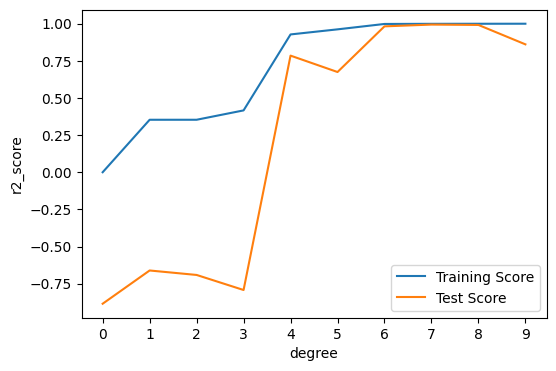

In [9]:
def plot_answer_two(answer_two):
  r2_train = answer_two[0] 
  r2_test = answer_two[1]

  plt.figure(figsize=(6, 4))

  plt.plot(np.arange(0, 10), r2_train , label = 'Training Score')
  plt.plot(np.arange(0, 10), r2_test , label = 'Test Score')

  plt.xlabel('degree')
  plt.ylabel('r2_score')

  plt.xticks(np.arange(0, 10))
  plt.legend(loc=4)
  plt.show()

plot_answer_two(answer_two())

In [10]:
x = answer_two()[0]
y = answer_two()[1]
x_sort = np.sort(x)
y_sort = np.sort(y)
x_sort, y_sort
x, y

(array([0.        , 0.35322777, 0.35328862, 0.4162791 , 0.92762136,
        0.96183526, 0.99813455, 0.99901402, 0.99947343, 0.99971499]),
 array([-0.88501534, -0.66128757, -0.69137084, -0.792653  ,  0.78499055,
         0.67463038,  0.98202812,  0.99395456,  0.9914833 ,  0.86086795]))

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics._regression import r2_score

def answer_three():
  r2_train, r2_test = answer_two()
    
  r2_train_sort = np.sort(r2_train)
  r2_test_sort = np.sort(r2_test)
  
  for degree , data in enumerate(zip(r2_train, r2_test)):
    if data[0] < r2_train_sort[5] and data[1] < r2_test_sort[5]:
      underfitting = degree 
    if data[0] > r2_train_sort[5] and data[1] > r2_test_sort[8]:
      generalization = degree 
    if data[0] > r2_test_sort[6] and data[1] < r2_test_sort[8]:
      overfitting = degree
  
  return underfitting, generalization, overfitting 
    
answer_three()

(3, 7, 9)

### Question 4: Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso Linear regression.
### For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameter `alpha=0.01, max_iter=10000)` on polynomial features of `degree 12`. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.
### This function return one tuple (`LinearRegression_R2_test_score, Lasso_R2_test_score`)

In [12]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics._regression import r2_score

def answer_four():
  X_tr = X_train.reshape(-1, 1)
  X_ts = X_test.reshape(-1, 1)

  poly = PolynomialFeatures(degree=12)
  X_tr_ = poly.fit_transform(X_tr)
  X_ts_ = poly.transform(X_ts)

  linreg = LinearRegression().fit(X_tr_, y_train)
  LinearRegression_R2_test_score = r2_score(y_test, linreg.predict(X_ts_)) 
  x = linreg.score(X_ts_, y_test)

  lasso = Lasso(alpha=0.01, max_iter=10000).fit(X_tr_, y_train)
  Lasso_R2_test_score = r2_score(y_test, lasso.predict(X_ts_))  
  y = lasso.score(X_ts_, y_test)

  return LinearRegression_R2_test_score, x, Lasso_R2_test_score, y

answer_four()
  

/opt/anaconda3/envs/dataenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.431e-01, tolerance: 7.105e-04
  model = cd_fast.enet_coordinate_descent(


(0.9906270260831594,
 0.9906270260831594,
 0.8940571418505063,
 0.8940571418505063)